In [14]:
#import libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import stats

# read in two data files
house = pd.read_csv('kc_house_data.csv', usecols=['price','grade'])#reads csv file but displays specified columns
house.head(10) #displays first 10 rows


,price,grade
0,221900.0,7
1,538000.0,7
2,180000.0,6
3,604000.0,7
4,510000.0,8
5,1225000.0,11
6,257500.0,7
7,291850.0,7
8,229500.0,7
9,323000.0,7


In [114]:
#descriptive statistics

price=list(house['price'])#creates a list of items under price column
grade=list(house['grade'])
print('Price')
print('Mode: ',stats.mode(price)[0] )#accesses mode method from stats library and returns the first item which is the modal value.
print('Median: ',np.median(price))
print('Count: ',len(price))
print('Mean: ',np.mean(price))
print('Standard deviation: ',np.std(price,ddof=1))
print('Range: ', np.max(price)-np.min(price),'\n')

print('Grade')
print('Mode: ',stats.mode(grade)[0] )
print('Median: ',int(np.median(grade)))
print('Count: ',len(grade))

Price
Mode:  [350000.]
Median:  450000.0
Count:  21613
Mean:  540088.1417665294
Standard deviation:  367127.19648269983
Range:  7625000.0 

Grade
Mode:  [7]
Median:  7
Count:  21613


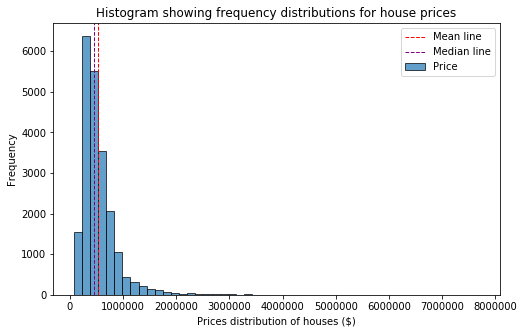

In [120]:
#Histogram for price

plt.rcParams["figure.figsize"] = [8,5]
fig,ax = plt.subplots()
ax.hist(price,label="Price", edgecolor="black", alpha=0.7, bins= 50)
ax.set(xlabel = 'Prices distribution of houses ($)', ylabel = 'Frequency', title = 'Histogram showing frequency distributions for house prices')
ax.axvline(np.mean(price), color="red", linestyle="dashed", linewidth=1, label="Mean line")#visualization for mean and median
ax.axvline(np.median(price), color="purple", linestyle="dashed", linewidth=1, label="Median line")
plt.legend()
plt.show()


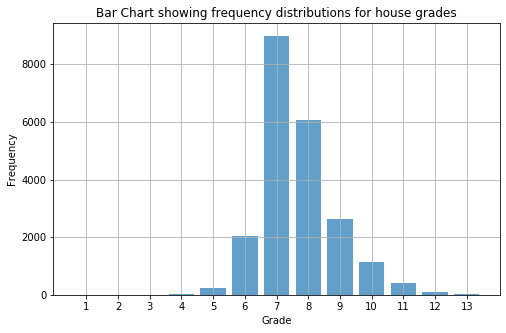

In [116]:
#barchart for grade distribution

label=[]
for i in range (1,14):
    label.append(str(i))#appends grade values as strings to label list
y_pos = np.arange(len(label))
gf = []
for i in range(1,14):
    gf.append(grade.count(i))#total number of occurence for each grade in counted and stored in gf list

plt.bar(y_pos, gf, align='center', alpha=0.7)
plt.xticks(y_pos, label)
plt.ylabel('Frequency')
plt.xlabel('Grade')
plt.title('Bar Chart showing frequency distributions for house grades')
plt.grid()
plt.show()

In [100]:
#confidence interval using t-distribution
def confidence_interval(ci): #ci in decimal
    df=len(price)-1 #degree of freedom
    pestimate=np.mean(price) #point estimate of sample distribution
    sampstd=np.std(price,ddof=1)
    SError=sampstd/(len(price)**0.5)
    tdf=stats.t.ppf((ci+0.025), df) #0.025 to account for both tails
    print("T-Score: ",tdf)
    lowbound = pestimate - tdf*SError
    highbound = pestimate + tdf*SError
    print(ci,"% confidence interval: ",[lowbound,highbound])
confidence_interval(0.95)

T-Score:  1.96007375697363
0.95 % confidence interval:  [535193.3812835508, 544982.9022495081]


--Low Grade--
count: 2313
mean: 295041.5356679637
std: 123556.0266136619 

--High Grade--
count: 19300
mean: 569455.6443523316
std: 375563.59478179424 

Red dashed line= mean line, Purple dashed line= median line


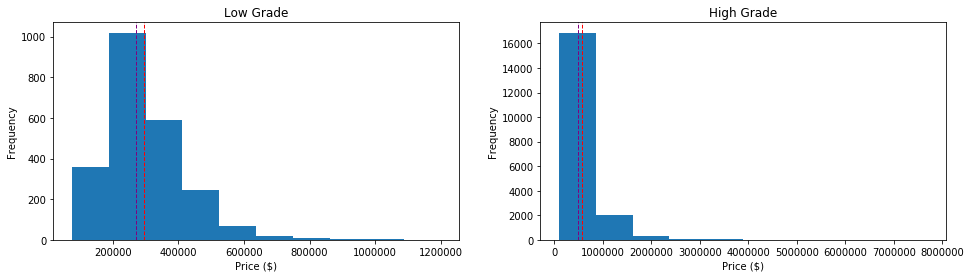

In [130]:
#Examine the sub-groups

low=list(house[house.grade < 7].values[:,0]) #creates a list of house prices whose grades values are less than 7
high=list(house[house.grade >=7].values[:,0])

def print_stats(list):#function to obtain common stats about any input list.
    print('count:',len(list))
    print('mean:',np.mean(list))
    print('std:',np.std(list,ddof=1),"\n")

print('--Low Grade--')
print_stats(low)
print('--High Grade--')
print_stats(high)

def double_histogram_maker(low,high,category): #creates histogram for both low and high grade houses
    fig, axs = plt.subplots(1,2,figsize=(16,4))
    axs[0].hist(low);
    axs[1].hist(high);
    axs[0].title.set_text('Low Grade')
    axs[1].title.set_text('High Grade')
    axs[0].axvline(np.mean(low), color="red", linestyle="dashed", linewidth=1, label="Mean line")
    axs[0].axvline(np.median(low), color="purple", linestyle="dashed", linewidth=1, label="Median line")
    axs[1].axvline(np.mean(high), color="red", linestyle="dashed", linewidth=1, label="Mean line")
    axs[1].axvline(np.median(high), color="purple", linestyle="dashed", linewidth=1, label="Median line")
    for ax in axs.flat:
        ax.set(xlabel=category, ylabel='Frequency')
double_histogram_maker(low,high,'Price ($)')
print("Red dashed line= mean line, Purple dashed line= median line")

In [93]:
def dofmeans(tails):
    n1 = len(low)
    n2 = len(high)

    x1 = np.mean(low)
    x2 = np.mean(high)

    s1 = np.std(low,ddof=1) # Bessel’s correction
    s2 = np.std(high,ddof=1)

    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    print("Standard Error: ",SE)
    Tscore = np.abs((x2 - x1)/SE)
    print("T-Score: ", Tscore)
    df = min(n1,n2) - 1 # conservative estimate for degree of freedom
    pvalue = tails*stats.t.cdf(-Tscore,df)

    SDpooled = np.sqrt((s1**2*(n1-1) + s2**2*(n2-1))/(n1+n2-2))
    Cohensd = (x2 - x1)/SDpooled
    correctionf=(1-(3/(4*(n1+n2)-9)))
    Hedgesg = Cohensd*correctionf

    print('p-value =',pvalue)
    print('Cohens d =',Cohensd)
    print('Hedges g =',Hedgesg)
dofmeans(2)

Standard Error:  3729.385118000082
T-Score:  73.5815958936215
p-value = 0.0
Cohens d = 0.7682374826577955
Hedges g = 0.7682108210143082
